In [1]:
# Import Python Package
import pandas as pd
import numpy as np

# Import sklearn package for machine learning (model fitting, predicting, cross-validation, etc.)
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression


# Import seaborn package for Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data load in dataframe format
sd = pd.read_csv('data_download.csv')
sd.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00320000,01/18/2023,320.0,C,A,72.02,...,-1.0,3,3,391.45,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,01/18/2023,391.49,SPY 230118P00320000,01/18/2023,320.0,P,A,0.01,...,-1.0,2,239,391.45,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00323000,01/18/2023,323.0,C,A,69.02,...,-1.0,1,0,391.45,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,01/18/2023,391.49,SPY 230118P00323000,01/18/2023,323.0,P,A,0.01,...,-1.0,0,240,391.45,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00324000,01/18/2023,324.0,C,A,68.02,...,-1.0,1,0,391.45,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
# Study correlation between the all features
sd.corr()

/var/folders/st/0vwmnbx52s9fx56m78r0bz_00000gn/T/ipykernel_13796/4133162035.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sd.corr()


,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
adjusted close,1.000000,-0.002019,-0.001416,-0.003028,-0.002232,-0.014362,-0.021158,-0.005678,1.000000,0.027822,0.005133,0.002976,0.010793,0.005902
strike,-0.002019,1.000000,0.129505,0.130476,0.129909,-0.243756,-0.004351,-0.067207,-0.002019,-0.499914,-0.095705,-0.016708,0.180755,-0.164232
ask,-0.001416,0.129505,1.000000,0.999753,0.999935,0.206815,-0.059359,-0.165265,-0.001416,-0.056733,-0.014730,-0.234387,0.194088,0.281276
bid,-0.003028,0.130476,0.999753,1.000000,0.999939,0.208600,-0.058644,-0.163618,-0.003028,-0.058359,-0.030599,-0.232671,0.191831,0.275126
mean price,-0.002232,0.129909,0.999935,0.999939,1.000000,0.207699,-0.058995,-0.164420,-0.002232,-0.057541,-0.022617,-0.233481,0.192902,0.278234
iv,-0.014362,-0.243756,0.206815,0.208600,0.207699,1.000000,-0.184150,0.040295,-0.014362,0.165301,0.010583,-0.065846,-0.076705,0.068637
volume,-0.021158,-0.004351,-0.059359,-0.058644,-0.058995,-0.184150,1.000000,0.152201,-0.021158,-0.016329,-0.049292,0.157624,-0.150090,-0.021934
open interest,-0.005678,-0.067207,-0.165265,-0.163618,-0.164420,0.040295,0.152201,1.000000,-0.005678,-0.010502,-0.041784,0.089784,-0.113530,-0.061854
stock price for iv,1.000000,-0.002019,-0.001416,-0.003028,-0.002232,-0.014362,-0.021158,-0.005678,1.000000,0.027822,0.005133,0.002976,0.010793,0.005902
delta,0.027822,-0.499914,-0.056733,-0.058359,-0.057541,0.165301,-0.016329,-0.010502,0.027822,1.000000,0.130459,-0.034268,-0.322506,0.459805


/var/folders/st/0vwmnbx52s9fx56m78r0bz_00000gn/T/ipykernel_13796/2362971986.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sd.corr())


<AxesSubplot: >

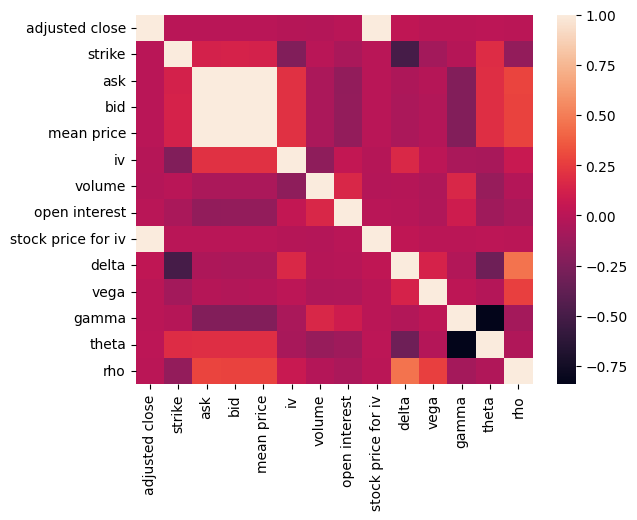

In [4]:
# Visual correlations between all features in graphical representation
sns.heatmap(sd.corr())

In [5]:
# Data extraction from date 2023, January 17 
jan17 = sd.loc[(sd['date'] == '01/17/2023') & (sd['iv'] > 0) & (sd["iv"] < 0.4)]
jan17.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,6897.00,6897.000000,6897.000000,6897.000000,6897.000000,6897.000000,6897.000000,6897.000000,6.897000e+03,6897.000000,6897.000000,6897.000000,6897.000000,6897.000000
mean,397.77,416.536465,39.475275,38.284076,38.872846,0.224185,555.983761,2303.562563,3.976900e+02,-0.041966,0.433250,0.006578,-0.051134,0.223740
std,0.00,94.779120,59.059039,58.212763,58.636319,0.064555,3916.960826,8283.402154,1.136951e-13,0.634601,0.532105,0.010303,0.069075,1.028550
min,397.77,150.000000,0.010000,0.000000,0.000000,0.130403,0.000000,0.000000,3.976900e+02,-1.000000,0.000000,0.000000,-0.815692,-3.757346
25%,397.77,362.000000,1.270000,1.050000,1.155000,0.172699,0.000000,0.000000,3.976900e+02,-0.494693,0.026491,0.000839,-0.071435,-0.042401
50%,397.77,400.000000,14.190000,13.190000,13.770000,0.208937,0.000000,78.000000,3.976900e+02,-0.005396,0.215503,0.003171,-0.031931,0.000000
75%,397.77,450.000000,50.160000,48.590000,49.350000,0.261375,50.000000,1364.000000,3.976900e+02,0.492535,0.650514,0.007438,-0.005196,0.152216
max,397.77,720.000000,325.000000,322.010000,322.500000,0.399857,116108.000000,169317.000000,3.976900e+02,0.996146,2.608893,0.098681,0.000000,5.621595


In [6]:
# X :- Input features as strike and delta
X_jan17 = jan17[["strike", "delta"]]
X_jan17

,strike,delta
8340,379.0,0.990184
8341,379.0,-0.009094
8343,380.0,-0.009511
8344,381.0,0.983645
8345,381.0,-0.009972
...,...,...
16077,640.0,-0.958293
16078,645.0,0.083771
16079,645.0,-0.958181
16080,650.0,0.078538


In [7]:
# y :- Output features as iv
y_jan17 = jan17["iv"]
y_jan17

8340     0.395309
8341     0.391193
8343     0.372350
8344     0.385006
8345     0.353453
           ...   
16077    0.259529
16078    0.160973
16079    0.262947
16080    0.160287
16081    0.266365
Name: iv, Length: 6897, dtype: float64

In [8]:
# Create Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_jan17, y_jan17)

LinearRegression()

In [9]:
# Create Polnomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_jan17)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_jan17)

LinearRegression()

In [10]:
# Create a new dataframe for testing purposes
test_df = sd.loc[(sd['date'] == '01/18/2023') & (sd['iv'] > 0) & (sd["iv"] < 0.4)]


# For testing purposes, we need to select only two input features
test_df_x = test_df[['strike','delta']]

jan18_comp = test_df['iv'].to_numpy()

x_jan18_comp = np.arange(1,len(jan18_comp)+1)
y_jan18_comp = jan18_comp

In [11]:
# Predict values using Polynomial Regression
poly_reg_pred = lin_reg_2.predict(poly_reg.fit_transform(test_df_x))
print(poly_reg_pred)

[0.23082733 0.22972729 0.22863219 ... 0.29812742 0.17450876 0.30035351]


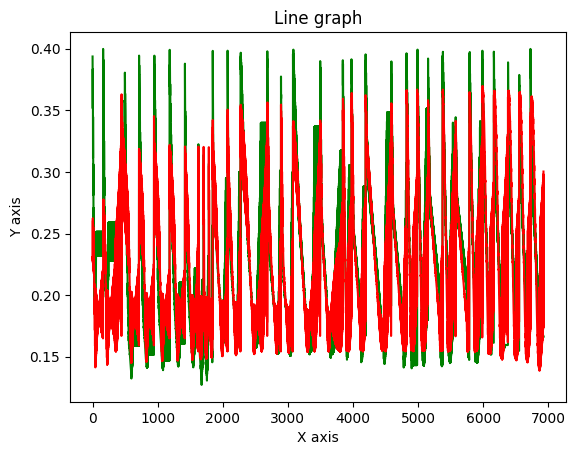

In [12]:
x_train = np.arange(1,len(poly_reg_pred)+1)
y_train = poly_reg_pred

# Graphical representation of actual value vs predicted value using Polynomial Regression

plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x_jan18_comp, y_jan18_comp, color ="green")
plt.plot(x_train, y_train, color ="red")
plt.show()

In [13]:
# Find accuracy of the given model
# Import metrics library
from sklearn import metrics


accuracy = 100 - np.mean(metrics.mean_absolute_percentage_error(y_jan18_comp, poly_reg_pred))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.87 %.


In [14]:
# Implement Support Vector Regression
# Importing the dataset

y_SVM = y_jan17.values.reshape(len(y_jan17),1)
y_SVM

array([[0.395309],
       [0.391193],
       [0.37235 ],
       ...,
       [0.262947],
       [0.160287],
       [0.266365]])

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_SVM_train = sc_X.fit_transform(X_jan17)
y_SVM_train = sc_y.fit_transform(y_SVM)

print(y_SVM_train.shape)
print(X_SVM_train.shape)


(6897, 1)
(6897, 2)


In [16]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X_SVM_train, y_SVM_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [17]:
# Predict values using SVM Regression
svm_pred = svm_regressor.predict(test_df_x).reshape(-1,)
print(svm_pred)
print(jan18_comp)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


[1.16879373 1.16879373 1.16879373 ... 1.16879373 1.16879373 1.16879373]
[0.393746 0.374579 0.355356 ... 0.166645 0.166167 0.166167]


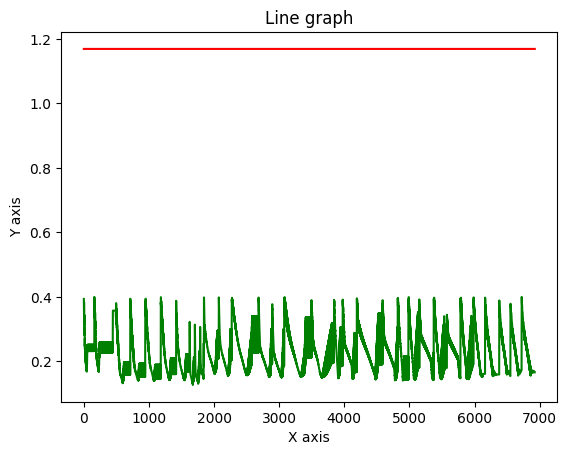

In [18]:
x_train = np.arange(1,len(svm_pred)+1)

plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x_jan18_comp, y_jan18_comp, color ="green")
plt.plot(x_train, svm_pred, color ="red")
plt.show()

In [19]:
# Find accuracy of the given model
# Import metrics library
from sklearn import metrics


accuracy = 100 - np.mean(metrics.mean_absolute_percentage_error(y_jan18_comp, svm_pred))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.42 %.


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_true = svm_pred
y_pred = jan18_comp


mse = mean_squared_error(y_true, y_pred)
accuracy = (1 - mse/np.var(y_true)) * 100
print("Accuracy: {:.2f}%".format(accuracy))


Accuracy: -1815814036383903184988864583303168.00%


In [21]:
from sklearn.metrics import r2_score
y_true = svm_pred
y_pred = jan18_comp
r2 = r2_score(y_true, y_pred)
accuracy = (r2) * 100
print("Accuracy: {:.2f}%".format(accuracy))


Accuracy: -1815814036383903184988864583303168.00%


In [22]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_jan17, y_jan17)

RandomForestRegressor(n_estimators=10, random_state=0)

In [23]:
# Predicting a new result
random_forest_pred = regressor.predict(X_jan17)

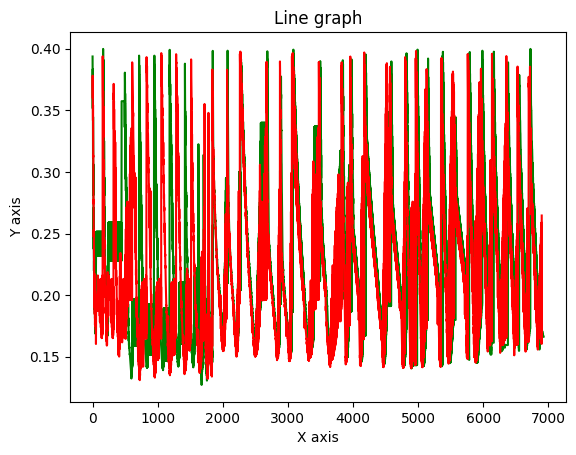

In [24]:
x_train = np.arange(1,len(random_forest_pred)+1)

plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x_jan18_comp, y_jan18_comp, color ="green")
plt.plot(x_train, random_forest_pred, color ="red")
plt.show()

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_true = y_jan18_comp
y_pred = regressor.predict(test_df_x)

mse = mean_squared_error(y_true, y_pred)
accuracy = (1 - mse/np.var(y_true)) * 100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 74.86%
